# 货币供应量

## 读数据

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
%matplotlib inline

In [5]:
df = pd.read_csv('../dataset/money_supply_data_month.csv', encoding="gbk")
df.tail()

,statYear,statMonth,m0Month,m0YOY,m0ChainRelative,m1Month,m1YOY,m1ChainRelative,m2Month,m2YOY,m2ChainRelative
550,2021,8,85100.0,6.3,0.472255,626700.0,4.2,1.015474,2312300.0,8.2,0.438711
551,2021,9,86900.0,5.5,2.115159,624600.0,3.7,-0.335089,2342800.0,8.3,1.319033
552,2021,10,86100.0,6.2,-0.920598,626100.0,2.8,0.240154,2336200.0,8.7,-0.281714
553,2021,11,87400.0,7.2,1.509872,637500.0,3.0,1.820795,2356000.0,8.5,0.847530
554,2021,12,90800.0,7.7,3.890160,647400.0,3.5,1.552941,2382900.0,9.0,1.141766


## 字段改名
数据字段参看：http://baostock.com/baostock/index.php/%E8%B4%A7%E5%B8%81%E4%BE%9B%E5%BA%94%E9%87%8F

In [7]:
df.rename(columns={
    "statYear": "year",
    "statMonth": "month",
    "m0Month": "m0",
    "m0YOY": "m0yoy",
    "m0ChainRelative": "m0c",
    "m1Month": "m1",
    "m1YOY": "m1yoy",
    "m1ChainRelative": "m1c",
    "m2Month": "m2",
    "m2YOY": "m2yoy",
    "m2ChainRelative": "m2c"
},
          inplace=True)

In [8]:
df["day"]=pd.Series([1]*df.shape[0])
date=pd.to_datetime(df[["year","month","day"]])
df.index=date

In [9]:
df[230:]

,year,month,m0,m0yoy,m0c,m1,m1yoy,m1c,m2,m2yoy,m2c,day
1994-12-01,1994,12,7288.6,24.30,7.152203,20540.70,26.2,4.320291,4.482720e+04,34.5,4.268351,1
1995-01-01,1995,1,9141.0,37.27,25.415032,20856.66,32.0,1.538214,4.587590e+04,NaN,2.339428,1
1995-02-01,1995,2,7765.0,23.15,-15.053058,20018.57,29.7,-4.018333,4.622547e+04,NaN,0.761983,1
1995-03-01,1995,3,7271.0,24.62,-6.361880,19835.70,27.9,-0.913502,4.797330e+04,NaN,3.781105,1
1995-04-01,1995,4,7268.0,25.01,-0.041260,19994.38,25.4,0.799972,4.887810e+04,NaN,1.886049,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,2021,8,85100.0,6.30,0.472255,626700.00,4.2,1.015474,2.312300e+06,8.2,0.438711,1
2021-09-01,2021,9,86900.0,5.50,2.115159,624600.00,3.7,-0.335089,2.342800e+06,8.3,1.319033,1
2021-10-01,2021,10,86100.0,6.20,-0.920598,626100.00,2.8,0.240154,2.336200e+06,8.7,-0.281714,1
2021-11-01,2021,11,87400.0,7.20,1.509872,637500.00,3.0,1.820795,2.356000e+06,8.5,0.847530,1


In [10]:
df.loc['1997-07-01',:]

year      1997.000000
month        7.000000
m0        9127.000000
m0yoy       16.900000
m0c          0.054813
m1       31100.000000
m1yoy       18.400000
m1c          0.083671
m2       83460.000000
m2yoy       18.100000
m2c          0.810494
day          1.000000
Name: 1997-07-01 00:00:00, dtype: float64

Text(2017-01-01, 15, '金融去杠杆')

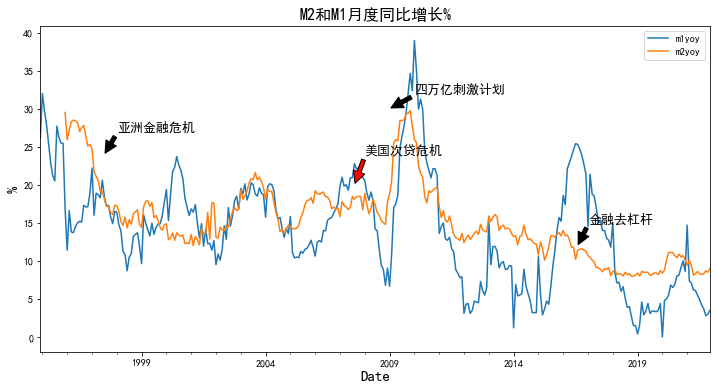

In [25]:
df[230:][["m1yoy","m2yoy"]].plot(figsize=(12,6))
plt.xlabel("Date",size=15)
plt.ylabel("%",size=15)
plt.title("M2和M1月度同比增长%",size=16)
plt.annotate("亚洲金融危机",size=13,xy=('1997-07-01',24),xytext=('1998-01-01',27),arrowprops=dict(facecolor='black',shrink=0.05))
plt.annotate("美国次贷危机",size=13,xy=('2007-08-01',20),xytext=('2008-01-01',24),arrowprops=dict(facecolor='red',shrink=0.05))
plt.annotate("四万亿刺激计划",size=13,xy=('2009-01-01',30),xytext=('2010-01-01',32),arrowprops=dict(facecolor='black',shrink=0.05))
plt.annotate("金融去杠杆",size=13,xy=('2016-08-01',12),xytext=('2017-01-01',15),arrowprops=dict(facecolor='black',shrink=0.05))

#  股票分析入门
原文：https://mp.weixin.qq.com/s?__biz=MzUyMDk1MDY2MQ==&mid=2247483868&idx=1&sn=61e911d9e33aa8d0b41e7342a0fc3c79&scene=21#wechat_redirect

## 使用tushare包获取数据
tushare获取自发布以来的数据

In [26]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
#正常显示画图时出现的中文
from pylab import mpl
#这里使用微软雅黑字体
mpl.rcParams['font.sans-serif']=['SimHei']
#画图时显示负号
mpl.rcParams['axes.unicode_minus']=False
import seaborn as sns  #画图用的
import tushare as ts
#Jupyter Notebook特有的magic命令
#直接在行内显示图形
%matplotlib inline    

In [27]:
sh=ts.get_k_data(code='sh',ktype='D',
  autype='qfq', start='1990-12-20')
#code:股票代码，个股主要使用代码，如‘600000’
#ktype:'D':日数据；‘m’：月数据，‘Y’:年数据
#autype:复权选择，默认‘qfq’前复权
#start：起始时间
#end：默认当前时间
#查看下数据前5行
sh.head(5)

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,date,open,close,high,low,volume,code
1,1990-12-20,113.1,113.5,113.5,112.85,1990.0,sh
2,1990-12-21,113.5,113.5,113.5,113.40,1190.0,sh
3,1990-12-24,113.5,114.0,114.0,113.30,8070.0,sh
4,1990-12-25,114.0,114.1,114.2,114.00,2780.0,sh
5,1990-12-26,114.4,114.3,114.4,114.20,310.0,sh


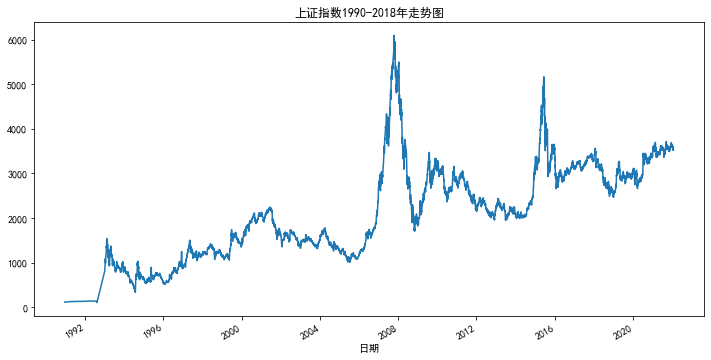

In [28]:
#将数据列表中的第0列'date'设置为索引
sh.index=pd.to_datetime(sh.date) 
#画出上证指数收盘价的走势
sh['close'].plot(figsize=(12,6))
plt.title('上证指数1990-2018年走势图')
plt.xlabel('日期')
plt.show()

In [29]:
help(ts.get_k_data)

Help on function get_k_data in module tushare.stock.trading:

get_k_data(code=None, start='', end='', ktype='D', autype='qfq', index=False, retry_count=3, pause=0.001)
    获取k线数据
    ---------
    Parameters:
      code:string
                  股票代码 e.g. 600848
      start:string
                  开始日期 format：YYYY-MM-DD 为空时取上市首日
      end:string
                  结束日期 format：YYYY-MM-DD 为空时取最近一个交易日
      autype:string
                  复权类型，qfq-前复权 hfq-后复权 None-不复权，默认为qfq
      ktype：string
                  数据类型，D=日k线 W=周 M=月 5=5分钟 15=15分钟 30=30分钟 60=60分钟，默认为D
      retry_count : int, 默认 3
                 如遇网络等问题重复执行的次数 
      pause : int, 默认 0
                重复请求数据过程中暂停的秒数，防止请求间隔时间太短出现的问题
    return
    -------
      DataFrame
          date 交易日期 (index)
          open 开盘价
          high  最高价
          close 收盘价
          low 最低价
          volume 成交量
          amount 成交额
          turnoverratio 换手率
          code 股票代码



In [30]:
#pandas的describe()函数提供了数据的描述性统计
#count:数据样本，mean:均值，std:标准差
sh.describe().round(2)

,open,close,high,low,volume
count,7427.00,7427.00,7427.00,7427.00,7.427000e+03
mean,2066.35,2067.74,2085.07,2046.39,9.227413e+07
std,1093.20,1094.56,1103.40,1081.90,1.209663e+08
min,105.50,105.50,105.50,105.50,1.000000e+01
25%,1224.16,1222.47,1236.04,1207.80,5.847220e+06
50%,2023.60,2027.35,2040.60,2011.99,4.249930e+07
75%,2935.28,2938.42,2958.80,2912.30,1.388745e+08
max,6057.43,6092.06,6124.04,6040.71,8.571328e+08


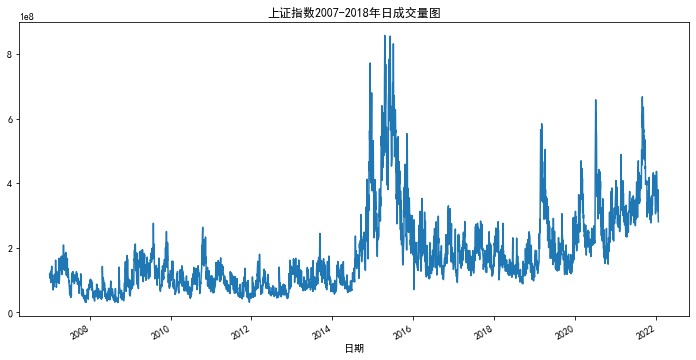

In [31]:
#再查看下每日成交量 
#2006年市场容量小，交易量比较小，我们从2007年开始看
sh.loc["2007-01-01":]["volume"].plot(figsize=(12,6))
plt.title('上证指数2007-2018年日成交量图')
plt.xlabel('日期')
plt.show()

## 均线分析

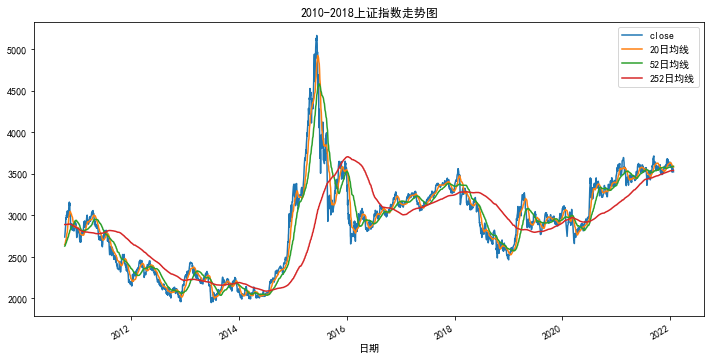

In [32]:
#这里的平均线是通过自定义函数，手动设置20,52,252日均线
#移动平均线：
ma_day = [20,52,252]

for ma in ma_day:
    column_name = "%s日均线" %(str(ma))
    sh[column_name] =sh["close"].rolling(ma).mean()
#sh.tail(3)
#画出2010年以来收盘价和均线图
sh.loc['2010-10-8':][["close",
"20日均线","52日均线","252日均线"]].plot(figsize=(12,6))
plt.title('2010-2018上证指数走势图')
plt.xlabel('日期')
plt.show()

## 日收益率可视化

pct_change() 计算变化率：（）后一个值-前一个值）/前一个值

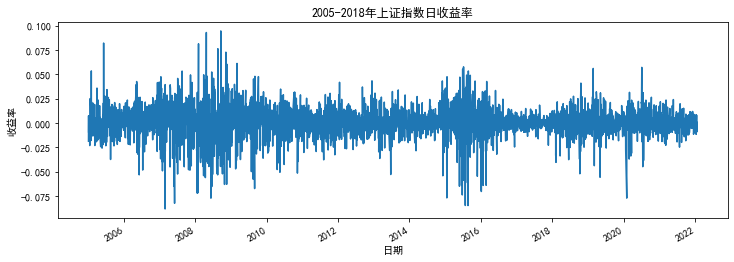

In [33]:
#2005年之前的数据噪音太大，主要分析2005年之后的
sh["日收益率"] = sh["close"].pct_change()
sh["日收益率"].loc['2005-01-01':].plot(figsize=(12,4))
plt.xlabel('日期')
plt.ylabel('收益率')
plt.title('2005-2018年上证指数日收益率')
plt.show()

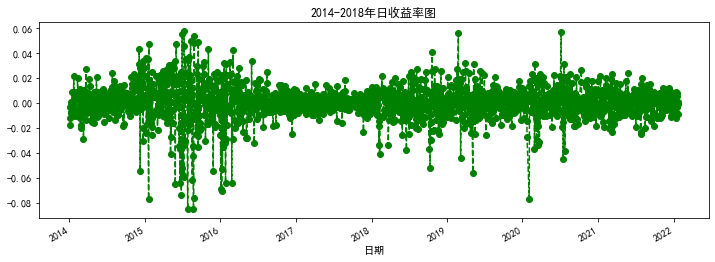

In [36]:
###这里我们改变一下线条的类型
#(linestyle)以及加一些标记(marker)
sh["日收益率"].loc['2014-01-01':].plot(figsize=
(12,4),linestyle="--",marker="o",color="g")
plt.title('2014-2018年日收益率图')
plt.xlabel('日期')
plt.show()

## 分析多只股票（指数）

In [37]:
#分析下常见的几个股票指数
stocks={'上证指数':'sh','深证指数':'sz','沪深300':'hs300',
        '上证50':'sz50','中小板指':'zxb','创业板':'cyb'}
stock_index=pd.DataFrame()
for stock in stocks.values():
    stock_index[stock]=ts.get_k_data(stock,ktype='D', 
autype='qfq', start='2005-01-01')['close']
#stock_index.head()
#计算这些股票指数每日涨跌幅
tech_rets = stock_index.pct_change()[1:]
#tech_rets.head()
#收益率描述性统计
tech_rets.describe()
#结果不在此报告
#均值其实都大于0
tech_rets.mean()*100 #转换为%

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


sh       0.037400
sz       0.053465
hs300    0.051627
sz50     0.046938
zxb      0.026053
cyb      0.040120
dtype: float64

对上述股票指数之间的相关性进行可视化分析：

D:\ProgramData\anaconda3\envs\ml37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


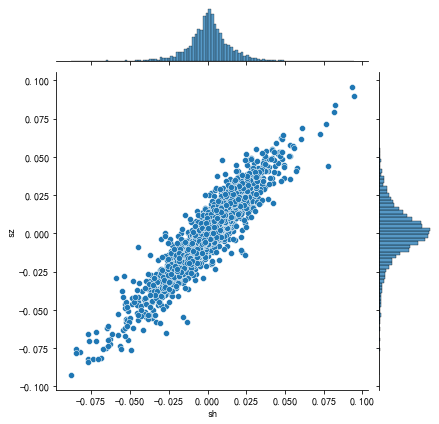

In [39]:
#jointplot这个函数可以画出两个指数的”相关性系数“，或者说皮尔森相关系数
sns.jointplot('sh','sz',data=tech_rets)

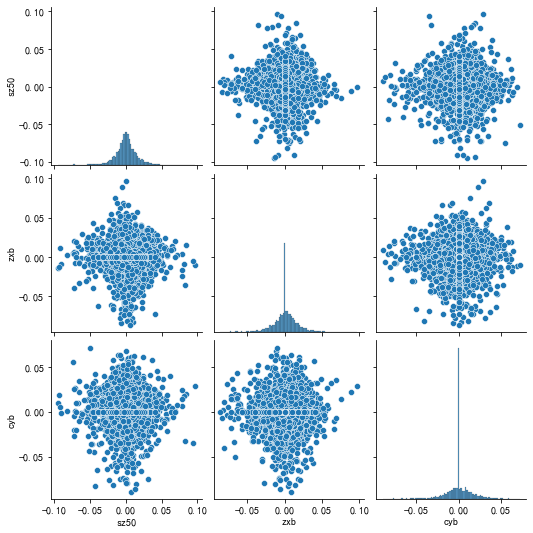

In [40]:
#成对的比较不同数据集之间的相关性，
#而对角线则会显示该数据集的直方图

sns.pairplot(tech_rets.iloc[:,3:].dropna())

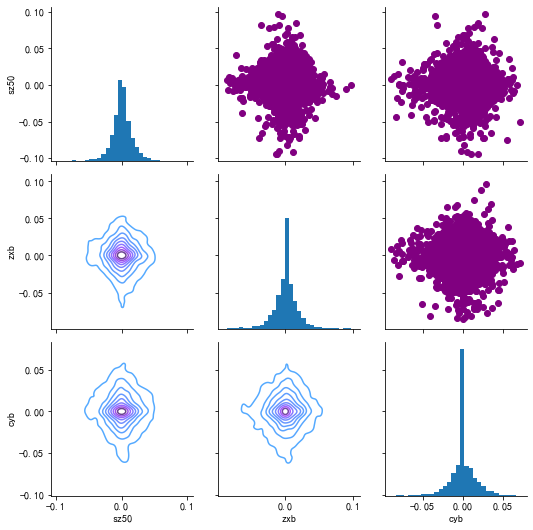

In [41]:
returns_fig = sns.PairGrid(tech_rets.iloc[:,3:].dropna())
###右上角画散点图
returns_fig.map_upper(plt.scatter,color="purple") 
###左下角画核密度图 
returns_fig.map_lower(sns.kdeplot,cmap="cool_d") 
###对角线的直方图 
returns_fig.map_diag(plt.hist,bins=30)

## 收益率与风险
使用均值和标准分别刻画股票（指数）的收益率和波动率，对比分析不同股票（指数）的收益-风险情况。

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


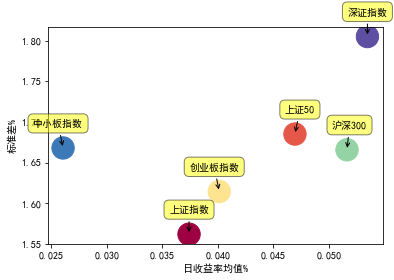

In [42]:
#构建一个计算股票收益率和标准差的函数
#默认起始时间为'2005-01-01'
def return_risk(stocks,startdate='2005-01-01'):
    close=pd.DataFrame()
    for stock in stocks.values():
        close[stock]=ts.get_k_data(stock,ktype='D', 
     autype='qfq', start=startdate)['close']
    tech_rets = close.pct_change()[1:]
    rets = tech_rets.dropna()
    ret_mean=rets.mean()*100
    ret_std=rets.std()*100
    return ret_mean,ret_std

#画图函数
def plot_return_risk():
    ret,vol=return_risk(stocks)
    color=np.array([ 0.18, 0.96, 0.75, 0.3, 0.9,0.5])
    plt.scatter(ret, vol, marker = 'o', 
    c=color,s = 500,cmap=plt.get_cmap('Spectral'))
    plt.xlabel("日收益率均值%")     
    plt.ylabel("标准差%")
    for label,x,y in zip(stocks.keys(),ret,vol):
        plt.annotate(label,xy = (x,y),xytext = (20,20),
            textcoords = "offset points",
             ha = "right",va = "bottom",
            bbox = dict(boxstyle = 'round,pad=0.5',
            fc = 'yellow', alpha = 0.5),
                arrowprops = dict(arrowstyle = "->",
                    connectionstyle = "arc3,rad=0"))
stocks={'上证指数':'sh','深证指数':'sz','沪深300':'hs300',
        '上证50':'sz50','中小板指数':'zxb','创业板指数':'cyb'}
plot_return_risk()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


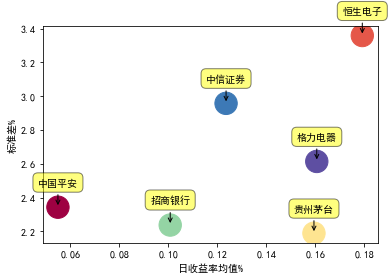

In [43]:
stocks={'中国平安':'601318','格力电器':'000651',
        '招商银行':'600036','恒生电子':'600570',
        '中信证券':'600030','贵州茅台':'600519'}
startdate='2018-01-01'
plot_return_risk()

## 蒙特卡洛模拟分析

蒙特卡洛模拟是一种统计学方法，用来模拟数据的演变趋势。蒙特卡洛模拟是在二战期间，当时在原子弹研制的项目中，为了模拟裂变物质的中子随机扩散现象，由美国数学家冯·诺伊曼和乌拉姆等发明的一种统计方法。之所以起名叫蒙特卡洛模拟，是因为蒙特卡洛在是欧洲袖珍国家摩纳哥一个城市，这个城市在当时是非常著名的一个赌城。因为赌博的本质是算概率，而蒙特卡洛模拟正是以概率为基础的一种方法，所以用赌城的名字为这种方法命名。蒙特卡洛模拟每次输入都随机选择输入值，通过大量的模拟，最终得出一个累计概率分布图。

In [44]:
df=ts.get_k_data('sh',ktype='D', autype='qfq', 
                 start='2005-01-01')
df.index=pd.to_datetime(df.date)
tech_rets = df.close.pct_change()[1:]
rets = tech_rets.dropna()
#rets.head()
#下面的结果说明，我们95%的置信，一天我们不会损失超过0.0264...
rets.quantile(0.05)

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


-0.024358170401568874

构建蒙特卡洛模拟函数：

Text(0.5, 1.0, '经过 252 天后上证指数模拟价格分布图')

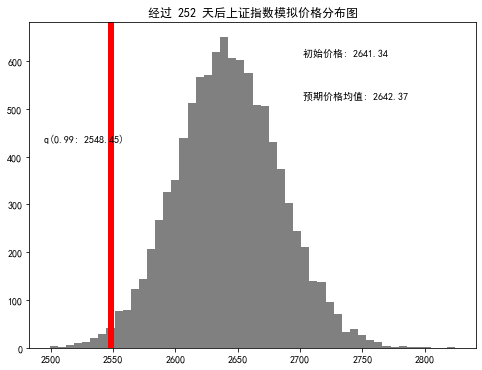

In [46]:
def monte_carlo(start_price,days,mu,sigma):
    dt=1/days
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt,
                scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] *
                (drift[x] + shock[x]))
    return price
#模拟次数
runs = 10000
start_price = 2641.34 #今日收盘价
days = 252
mu=rets.mean()
sigma=rets.std()
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monte_carlo(start_price,
      days,mu,sigma)[days-1]
q = np.percentile(simulations,1)
plt.figure(figsize=(8,6))
plt.hist(simulations,bins=50,color='grey')
plt.figtext(0.6,0.8,s="初始价格: %.2f" % start_price)
plt.figtext(0.6,0.7,"预期价格均值: %.2f" %simulations.mean())
plt.figtext(0.15,0.6,"q(0.99: %.2f)" %q)
plt.axvline(x=q,linewidth=6,color="r")
plt.title("经过 %s 天后上证指数模拟价格分布图" %days,weight="bold")

实际上蒙特卡洛模拟在期权定价里面还是很有用的。我们借用期权定价里对未来股票走势的假定来进行蒙特卡洛模拟。

In [48]:
import numpy as np
from time import time
np.random.seed(2018)
t0=time()
S0=2641.34
T=1.0; 
r=0.05; 
sigma=rets.std()
M=50;
dt=T/M; 
I=250000
S=np.zeros((M+1,I))
S[0]=S0
for t in range(1,M+1):
    z=np.random.standard_normal(I)
    S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+
          sigma*np.sqrt(dt)*z)
s_m=np.sum(S[-1])/I
tnp1=time()-t0
print('经过250000次模拟，得出1年以后上证指数的预期平均收盘价为：%.2f'%s_m)

经过250000次模拟，得出1年以后上证指数的预期平均收盘价为：2776.84


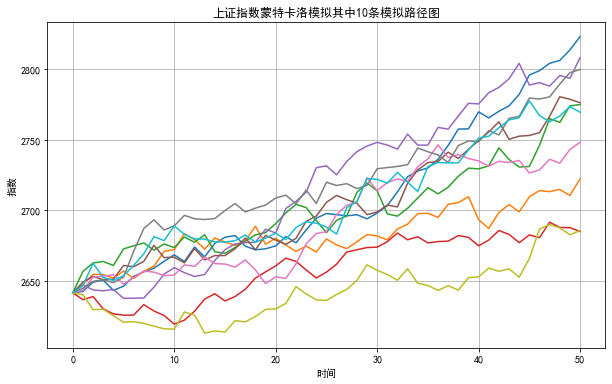

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(S[:,:10])
plt.grid(True)
plt.title('上证指数蒙特卡洛模拟其中10条模拟路径图')
plt.xlabel('时间')
plt.ylabel('指数')
plt.show()

Text(0.5, 1.0, '上证指数蒙特卡洛模拟')

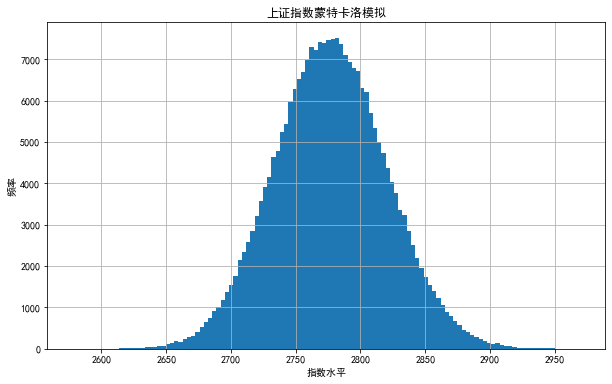

In [51]:
plt.figure(figsize=(10,6))
plt.hist(S[-1], bins=120)
plt.grid(True)
plt.xlabel('指数水平')
plt.ylabel('频率')
plt.title('上证指数蒙特卡洛模拟')

# pyecharts 绘制K线图 Kline/Candlestick

In [1]:
from pyecharts import options as opts
from pyecharts.charts import Kline

data = [
    [2320.26, 2320.26, 2287.3, 2362.94],
    [2300, 2291.3, 2288.26, 2308.38],
    [2295.35, 2346.5, 2295.35, 2345.92],
    [2347.22, 2358.98, 2337.35, 2363.8],
    [2360.75, 2382.48, 2347.89, 2383.76],
    [2383.43, 2385.42, 2371.23, 2391.82],
    [2377.41, 2419.02, 2369.57, 2421.15],
    [2425.92, 2428.15, 2417.58, 2440.38],
    [2411, 2433.13, 2403.3, 2437.42],
    [2432.68, 2334.48, 2427.7, 2441.73],
    [2430.69, 2418.53, 2394.22, 2433.89],
    [2416.62, 2432.4, 2414.4, 2443.03],
    [2441.91, 2421.56, 2418.43, 2444.8],
    [2420.26, 2382.91, 2373.53, 2427.07],
    [2383.49, 2397.18, 2370.61, 2397.94],
    [2378.82, 2325.95, 2309.17, 2378.82],
    [2322.94, 2314.16, 2308.76, 2330.88],
    [2320.62, 2325.82, 2315.01, 2338.78],
    [2313.74, 2293.34, 2289.89, 2340.71],
    [2297.77, 2313.22, 2292.03, 2324.63],
    [2322.32, 2365.59, 2308.92, 2366.16],
    [2364.54, 2359.51, 2330.86, 2369.65],
    [2332.08, 2273.4, 2259.25, 2333.54],
    [2274.81, 2326.31, 2270.1, 2328.14],
    [2333.61, 2347.18, 2321.6, 2351.44],
    [2340.44, 2324.29, 2304.27, 2352.02],
    [2326.42, 2318.61, 2314.59, 2333.67],
    [2314.68, 2310.59, 2296.58, 2320.96],
    [2309.16, 2286.6, 2264.83, 2333.29],
    [2282.17, 2263.97, 2253.25, 2286.33],
    [2255.77, 2270.28, 2253.31, 2276.22],
]

kline = (Kline().add_xaxis(["2017/7/{}".format(i + 1) for i in range(31)
                            ]).add_yaxis("kline", data).set_global_opts(
                                yaxis_opts=opts.AxisOpts(is_scale=True),
                                xaxis_opts=opts.AxisOpts(is_scale=True),
                                title_opts=opts.TitleOpts(title="Kline-基本示例"),
                            ))
kline.render("../dataset/Kline-基本示例.html")

'E:\\github\\jupyter_notebook\\dataset\\Kline-基本示例.html'